# NN : Régression avec PyTorch

In [1]:
## Importer les modules nécessaires 
import numpy as np
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import math

## Base de données

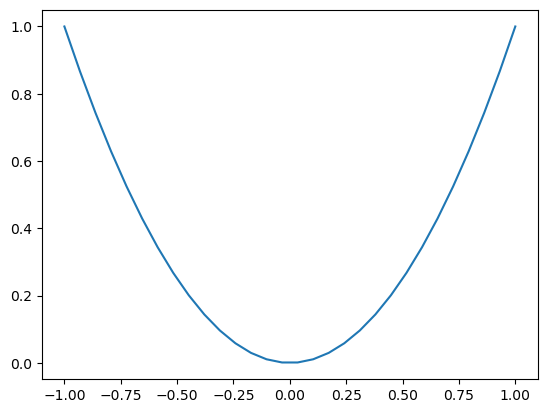

In [2]:
def parabola_database(M=30):
    x = np.linspace(-1,1,M)     # one dimensional (column) vector
    x = np.reshape(x,[M,1])     # reshape as a **column** vector
    y = x**2
    return x, y

## Base de données
M = 30                     # number of training samples
x, y = parabola_database(M);
plt.plot(x,y)


## Base de test
Mtest = 1000
xtest , ytest = parabola_database(Mtest);


## Premier modèle simple

In [ ]:
import torch
from torch.autograd import Variable
from torch.optim import Adam, SGD

In [4]:
# Nous transformons les données NumPy (x,y) au format PyTorch:
xvar = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
yvar = Variable(torch.from_numpy(y)).type(torch.FloatTensor)

# On définit ensuite le réseau du TP1 avec les lignes suivantes.
def build_model(h):
    D_in, D_out =  1, 1
    model = torch.nn.Sequential(
        torch.nn.Linear(D_in, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, D_out),
    )
    return model

h = 3;
model = build_model(h)

# Fonction de Perte quadratique
# https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss
loss_fn = torch.nn.MSELoss()

## Entrainement simple (Descente de gradient)

PyTorch s'occupe de la différentiation automatique (autograd)

In [5]:
## Train the network

learning_rate = 0.01
#for param in model.parameters():
#    param.data = 0.1*torch.randn(param.data.size());
for t in range(10000):
    # Forwar pass (computes values and derivatives of each layer dout/din dout/dparam)
    y_pred = model(xvar)
    loss = loss_fn(y_pred, yvar)
    # Show loss function progress every 100 iterations
    if t % 1000 == 0:
        print(t, loss.data)
    # Backward pass (apply chain rule)
    model.zero_grad()
    loss.backward()
    # Gradient descent:
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data


0 tensor(0.1246)
1000 tensor(0.0505)
2000 tensor(0.0149)
3000 tensor(0.0079)
4000 tensor(0.0067)
5000 tensor(0.0063)
6000 tensor(0.0063)
7000 tensor(0.0062)
8000 tensor(0.0062)
9000 tensor(0.0062)


Average training error (RMSE): 0.07888
Average testing error (RMSE): 0.07544


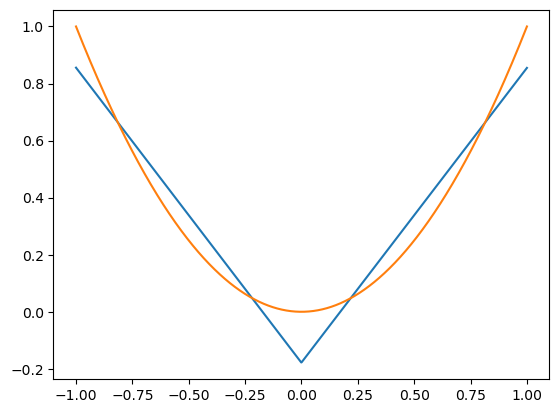

In [6]:
def plot_errors():
    # Training error
    y_pred = model(xvar)
    err = y_pred.data.numpy() - y
    print("Average training error (RMSE): %.5f" % np.sqrt(np.mean(err**2)))

    # Test error
    #xtestvar = Variable(torch.from_numpy(xtest)).type(torch.FloatTensor)
    xtestvar = torch.from_numpy(xtest).type(torch.FloatTensor)
    ytestpred = model(xtestvar).data.numpy()
    err = ytestpred - ytest
    print("Average testing error (RMSE): %.5f" % np.sqrt(np.mean(err**2)))

    # Plot Prediction vs ground truth
    plt.plot(xtest,ytestpred) # Prediction
    plt.plot(xtest,ytest)     # Ground Truth
    plt.show()

plot_errors()

## Optimisation (Adam / SGD)

0 tensor(0.1948)
100 tensor(0.1255)
200 tensor(0.0885)
300 tensor(0.0711)
400 tensor(0.0578)
500 tensor(0.0463)
600 tensor(0.0358)
700 tensor(0.0269)
800 tensor(0.0192)
900 tensor(0.0136)
Average training error (RMSE): 0.09686
Average testing error (RMSE): 0.08856


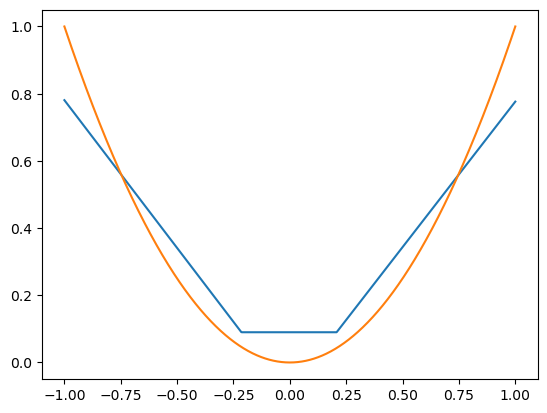

In [7]:
## Train the network

# Random init
for param in model.parameters():
    param.data = 0.1*torch.randn(param.data.size());

optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0) #équivalent à une implémentation de descente gradient
for t in range(1000):
    def closure():
        y_pred = model(xvar) #calcul y_pred
        loss = loss_fn(y_pred, yvar) #la perte
        if t % 100 == 0: # va imprimer l'erreur toutes les 100 valeurs de t
            print(t, loss.data)
        optimizer.zero_grad() # met à zeros les gradients
        loss.backward() #calcul dL/dW
        return loss
    optimizer.step(closure) #fait l'équivalent de l'étape de descente de gradient

# training and test errors
plot_errors()

0 tensor(0.2158)
100 tensor(0.0992)
200 tensor(0.0922)
300 tensor(0.0807)
400 tensor(0.0730)
500 tensor(0.0691)
600 tensor(0.0671)
700 tensor(0.0660)
800 tensor(0.0653)
900 tensor(0.0649)
Average training error (RMSE): 0.25434
Average testing error (RMSE): 0.23892


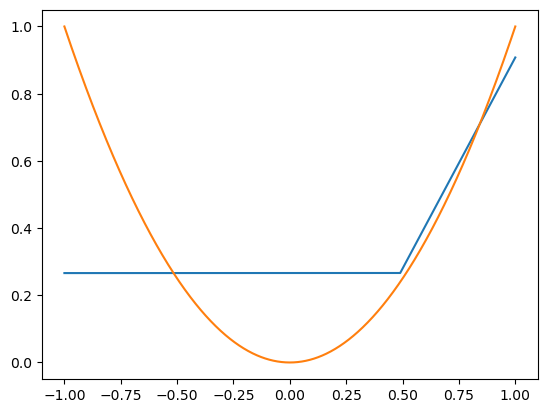

In [8]:
## Train the network

# Random init
for param in model.parameters():
    param.data = 0.1*torch.randn(param.data.size());

optimizer = SGD(model.parameters(),lr=0.1)
for t in range(1000):
    def closure():
        y_pred = model(xvar)
        loss = loss_fn(y_pred, yvar)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

# training and test errors
plot_errors()

## Regularisation

0 tensor(0.3094)
100 tensor(0.1825)
200 tensor(0.1424)
300 tensor(0.1015)
400 tensor(0.0660)
500 tensor(0.0433)
600 tensor(0.0267)
700 tensor(0.0157)
800 tensor(0.0081)
900 tensor(0.0028)
Average training error (RMSE): 0.03622
Average testing error (RMSE): 0.05237


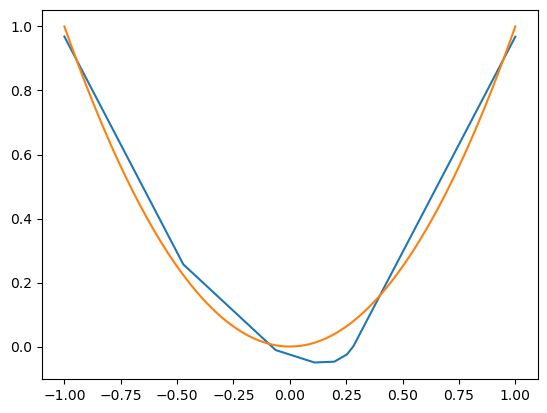

In [9]:

## Cas d'application :
## il est intéressant d'appliquer la régularisation sur un cas où on a peu de données mais on a mis bcp de paramètres i.e 
## un cas de sur-ajustement soit :

M = 5
h = 10 
x, y = parabola_database(M)
model = build_model(h)

# Nous transformons les données NumPy (x,y) au format PyTorch:
xvar = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
yvar = Variable(torch.from_numpy(y)).type(torch.FloatTensor)


# Random init
for param in model.parameters():
    param.data = 0.1*torch.randn(param.data.size());

#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-2)
optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-4)
for t in range(1000):
    def closure():
        y_pred = model(xvar)
        loss = loss_fn(y_pred, yvar)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

# training and test errors
plot_errors()


L'effet de la pénalisation lorsque le nombre de param > quantité de données est de régulariser la fonction en sortie i.e de la rendre plus lisse. Il vaut mieux en général avoir beaucoup de paramètres et faire une régularisation plutôt que de diminuer les paramètres.

## Réseaux larges vs profonds

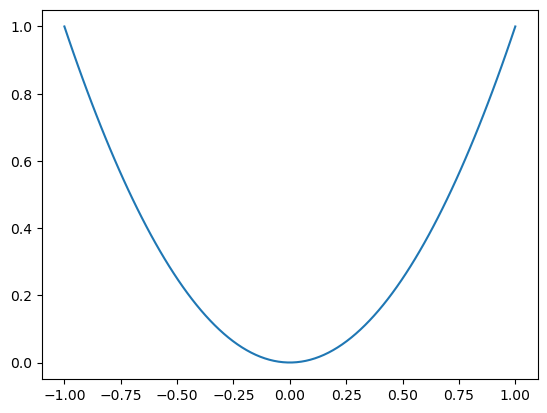

In [25]:
## Base de données
M = 100                     # number of training samples
x, y = parabola_database(M);
plt.plot(x,y)


## Base de test
Mtest = 1000
xtest , ytest = parabola_database(Mtest);


# Nous transformons les données NumPy (x,y) au format PyTorch:
xvar = Variable(torch.from_numpy(x)).type(torch.FloatTensor)
yvar = Variable(torch.from_numpy(y)).type(torch.FloatTensor)


D_in, D_out =  1, 1
h = 9
large_model = build_model(9) ## COMPLETER cf la case où il y a def build_model et la modifier en conséquence 
h = 3
deep_model = torch.nn.Sequential(
        torch.nn.Linear(D_in, h),
        torch.nn.ReLU(),   # or ReLU or Tanh, ### taille (D_in, h) en sortie (idem que l'entrée)
        torch.nn.Linear(h, h), ## entrée de dimension h ou (1,h)
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, D_out),
    )
average_model = torch.nn.Sequential(
        torch.nn.Linear(D_in, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, D_out),
    )

0 tensor(0.1671)
100 tensor(0.1004)
200 tensor(0.0835)
300 tensor(0.0760)
400 tensor(0.0597)
500 tensor(0.0457)
600 tensor(0.0334)
700 tensor(0.0233)
800 tensor(0.0156)
900 tensor(0.0102)
1000 tensor(0.0067)
1100 tensor(0.0046)
1200 tensor(0.0034)
1300 tensor(0.0026)
1400 tensor(0.0022)
1500 tensor(0.0019)
1600 tensor(0.0017)
1700 tensor(0.0016)
1800 tensor(0.0015)
1900 tensor(0.0014)
Average training error (RMSE): 0.03672
Average testing error (RMSE): 0.03566


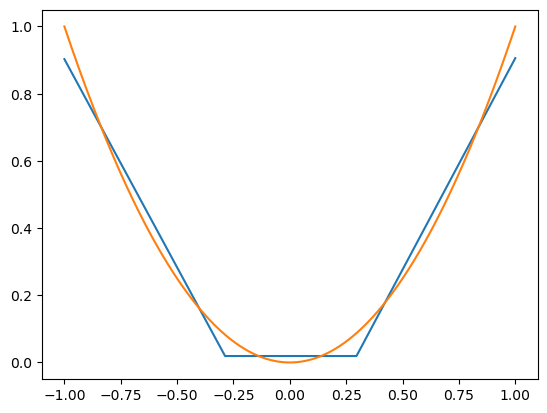

In [12]:
# Cas 1: Réseau large

model = large_model

# Random init
for param in model.parameters():
    param.data = 0.1*torch.randn(param.data.size());

optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-2)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-4)
for t in range(2000):
    def closure():
        y_pred = model(xvar)
        loss = loss_fn(y_pred, yvar)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

# training and test errors
plot_errors()

0 tensor(0.2844)
100 tensor(0.2033)
200 tensor(0.0945)
300 tensor(0.0831)
400 tensor(0.0748)
500 tensor(0.0669)
600 tensor(0.0617)
700 tensor(0.0596)
800 tensor(0.0589)
900 tensor(0.0587)
1000 tensor(0.0586)
1100 tensor(0.0586)
1200 tensor(0.0586)
1300 tensor(0.0586)
1400 tensor(0.0586)
1500 tensor(0.0586)
1600 tensor(0.0586)
1700 tensor(0.0586)
1800 tensor(0.0586)
1900 tensor(0.0586)
Average training error (RMSE): 0.24202
Average testing error (RMSE): 0.23776


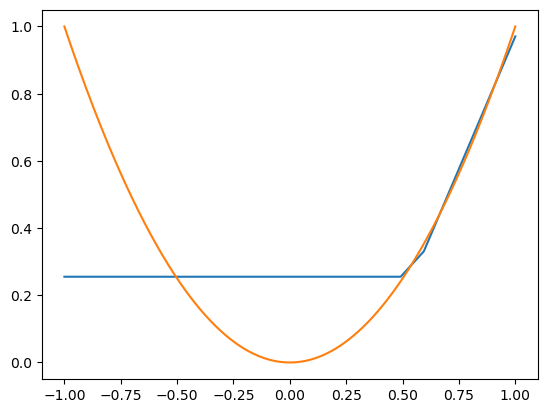

In [23]:
# Cas 2: Réseau profond
deep_model = torch.nn.Sequential(
        torch.nn.Linear(D_in, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, h),
        torch.nn.ReLU(),   # or ReLU or Tanh
        torch.nn.Linear(h, D_out),
    )
model = deep_model

# Random init
for param in model.parameters():
    param.data = 0.1*torch.randn(param.data.size());

#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-2)
optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-4)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-6)
for t in range(2000):
    def closure():
        y_pred = model(xvar)
        loss = loss_fn(y_pred, yvar)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

# training and test errors
plot_errors()

0 tensor(0.1868)
100 tensor(0.1240)
200 tensor(0.0921)
300 tensor(0.0860)
400 tensor(0.0783)
500 tensor(0.0598)
600 tensor(0.0384)
700 tensor(0.0181)
800 tensor(0.0080)
900 tensor(0.0038)
1000 tensor(0.0021)
1100 tensor(0.0015)
1200 tensor(0.0013)
1300 tensor(0.0012)
1400 tensor(0.0012)
1500 tensor(0.0011)
1600 tensor(0.0011)
1700 tensor(0.0011)
1800 tensor(0.0011)
1900 tensor(0.0011)
Average training error (RMSE): 0.03383
Average testing error (RMSE): 0.03327


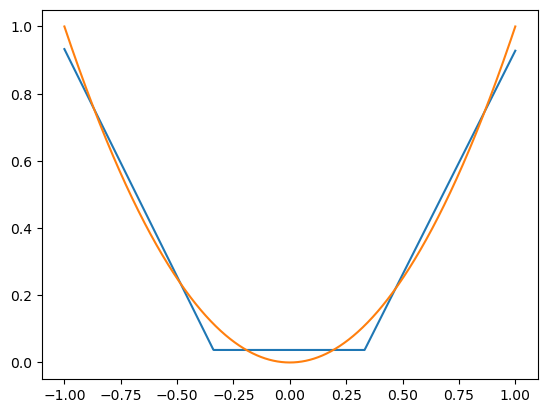

In [27]:
# Cas 3: Réseau moyen

model = average_model

# Random init
for param in model.parameters():
    param.data = 0.1*torch.randn(param.data.size());

#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=0)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-2)
#optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-4)
optimizer = Adam(model.parameters(),amsgrad=True,weight_decay=1e-6)
for t in range(2000):
    def closure():
        y_pred = model(xvar)
        loss = loss_fn(y_pred, yvar)
        if t % 100 == 0:
            print(t, loss.data)
        optimizer.zero_grad()
        loss.backward()
        return loss
    optimizer.step(closure)

# training and test errors
plot_errors()

### Conclusion 
Réseau de neurones large : Beaucoup de neurones dans une ou plusieurs couches cachées, bonne pour la capture de données complexes, mais sujette au surapprentissage.

Réseau de neurones profond : Plusieurs couches cachées, capture des caractéristiques hiérarchiques, nécessite plus de données et de puissance de calcul.

Réseau de neurones de taille moyenne : Un compromis entre largeur et profondeur, adapté à de nombreuses tâches, plus facile à entraîner que les réseaux très larges ou profonds.